In [6]:
!git clone https://github.com/phandaiduonghcb/CS114.L21

Cloning into 'CS114.L21'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 88 (delta 12), reused 59 (delta 6), pack-reused 0
Unpacking objects: 100% (88/88), done.


In [7]:
!mv /content/CS114.L21/BTQT/17-5/wecode.csv wecode.csv
!mv /content/CS114.L21/BTQT/17-5/score_training.csv score.csv


In [ ]:
!head wecode.csv

"id","assignment_id","problem_id","user_id","is_final","status","pre_score","coefficient","file_name","language_id","created_at","updated_at"
"4","0","3","4","1","SCORE","10000","100","solution-0","2","2020-10-30 10:58:11","2020-10-30 10:58:19"
"5","0","4","4","1","SCORE","10000","100","solution-1","2","2020-10-30 11:07:09","2020-10-30 11:07:17"
"6","0","5","4","0","Compilation Error","0","100","solution-2","2","2020-10-30 11:08:01","2020-10-30 11:23:36"
"7","0","5","4","0","Compilation Error","0","100","solution-3","2","2020-10-30 11:11:41","2020-10-30 11:11:42"
"8","0","5","4","0","Compilation Error","0","100","solution-4","2","2020-10-30 11:15:06","2020-10-30 11:15:07"
"9","0","5","4","0","Compilation Error","0","100","solution-5","2","2020-10-30 11:16:57","2020-10-30 11:16:58"
"10","0","6","4","1","SCORE","10000","100","solution-6","2","2020-10-30 11:18:47","2020-10-30 11:18:55"
"11","0","7","4","1","SCORE","10000","100","solution-7","2","2020-10-30 11:20:07","2020-10-30 11:20:15"


In [97]:
import sys
import csv
i=0
dic = {}
with open('wecode.csv') as csvfile:
  csv_reader = csv.reader(csvfile,delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    problem_id = row[2]
    id = row[0]
    user_id = row[3]
    is_final = int(row[4])
    score = int(row[6])
    sum_score = 0
    tries = 0
    solved = 0
    if is_final:
      sum_score = score
    if score == 10000:
      solved = 1
    else:
      tries = 1

    if user_id not in dic.keys():
      dic[user_id] = [sum_score,{problem_id:[tries,solved]}]
    else:
      arr = dic[user_id]
      arr[0]+=sum_score
      if problem_id not in arr[1].keys():
        arr[1][problem_id] = [tries,solved]
      else:
        a = arr[1][problem_id]
        a[0]+=tries
        a[1]+=solved
        arr[1][problem_id] = a




In [98]:

for user_id in dic.keys():
  tong_unsolved_solved = 0
  so_problem_submited = len(dic[user_id][1])
  a = dic[user_id]
  tong = 0
  for problem_id in a[1].keys():
    tong_unsolved_solved += (a[1][problem_id][0] + a[1][problem_id][1])
    tong+=(a[1][problem_id][1])/(tong_unsolved_solved)
  a[1] = tong
  a.append(so_problem_submited/tong_unsolved_solved)
  dic[user_id] = a

In [99]:
dic['4'] #Tổng điểm các bài is_final, tổng tỉ lệ solved/tổng số lần submit của mỗi problem, tỉ lệ số problem đã submit/ số submission

[370000, 3.404338241265562, 0.7592592592592593]

In [ ]:
!head score.csv

id,QT,GK,TH,CK,TBM,TBTL
22,10,9,8.5,8.5,8.8,8.52
24,10,8,10,9.5,9.4,8.41
27,10,10,10,10,10,8.67
28,10,9.5,7.5,9.5,9.2,7.39
29,10,9.5,5,8.5,8.2,8.05
30,10,10,9,9,9.3,8.63
34, , ,9,6.5, ,6.24
35,7,9.5,6,4.5,6.2,5.75
36,4.5,8,9,7,7.6,8.51


In [100]:
X_1 = []
X = []
y = []

with open('score.csv') as csvfile:
  csv_reader = csv.reader(csvfile,delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    user_id = row[0]
    if user_id in dic.keys():
      arr = dic[user_id]
      try:
        cuoiki = float(row[4])
      except:
        cuoiki = 0
      arr.append(cuoiki)
      dic[user_id] = arr

for user_id in dic.keys():
  if len(dic[user_id])==3:
    X_1.append(dic[user_id])
  else:
    X.append(dic[user_id][:-1])
    y.append(dic[user_id][-1])

In [101]:
X[:10]

[[824256, 0.7154917196390982, 0.332089552238806],
 [939166, 2.4366611377673477, 0.44907407407407407],
 [948180, 1.0873861206134656, 0.2357142857142857],
 [972744, 1.8640054497014393, 0.42677824267782427],
 [984714, 1.3794574047207988, 0.4331983805668016],
 [1093250, 1.7301895242466034, 0.3125],
 [1085241, 1.0396210044988567, 0.2687651331719128],
 [1042644, 1.4442495677847809, 0.3698630136986301],
 [1038888, 1.208565508220624, 0.43089430894308944],
 [1054068, 1.7274368942869318, 0.41568627450980394]]

In [102]:

X_1[:10]

[[370000, 3.404338241265562, 0.7592592592592593],
 [969716, 2.2711591073194852, 0.41841004184100417],
 [629000, 1.2054084394460833, 0.46],
 [370000, 3.1735938716074448, 0.7818181818181819],
 [908173, 1.4360853204589035, 0.3939393939393939],
 [1073263, 0.8059498773008636, 0.18120805369127516],
 [826937, 1.551830706990581, 0.33725490196078434],
 [575000, 1.5718494623725545, 0.5116279069767442],
 [458666, 1.670343319082334, 0.49504950495049505],
 [1323982, 2.464172427704691, 0.30344827586206896]]

In [103]:
y[:10]

[8.5, 8.5, 7.5, 9.0, 8.5, 8.0, 7.0, 9.0, 2.5, 8.0]

<function matplotlib.pyplot.show>

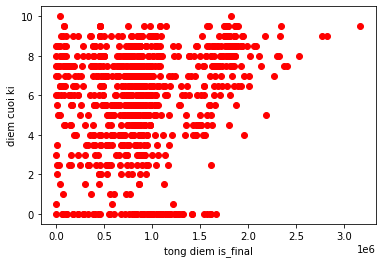

In [106]:
import matplotlib.pyplot as plt
for i in range(len(y)):
  plt.scatter(X[i][0],y[i],c='red')
  plt.xlabel('tong diem is_final')
  plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

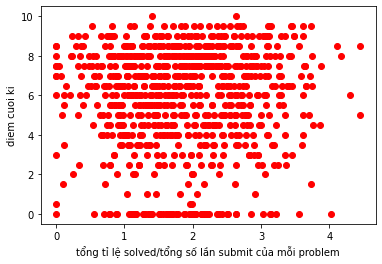

In [107]:
import matplotlib.pyplot as plt
for i in range(len(y)):
  plt.scatter(X[i][1],y[i],c='red')
  plt.xlabel('tổng tỉ lệ solved/tổng số lần submit của mỗi problem')
  plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

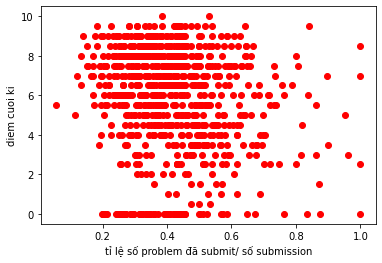

In [108]:
import matplotlib.pyplot as plt
for i in range(len(y)):
  plt.scatter(X[i][2],y[i],c='red')
  plt.xlabel('tỉ lệ số problem đã submit/ số submission')
  plt.ylabel('diem cuoi ki')
plt.show

In [57]:
import numpy as np

X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (682, 3) (682,)
Test (171, 3) (171,)


In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
MSE = ((predicted-y_test)**2).sum()/len(y_test)
RMSE = np.sqrt(MSE)
print(RMSE/y_test.mean()*100)
print(reg.score(X_test,y_test))

42.19710973796775
0.006613761518755923


In [ ]:
for x in